In [31]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly
from scipy import signal
import math
import os
plotly.offline.init_notebook_mode(connected=True)
os.chdir(r'E:\桌面\建投工作文件\库存周期')

# 准备数据

In [32]:
def detrend(seriesLike):
    notna = seriesLike[seriesLike.notna()]
    seriesLike[seriesLike.notna()] = signal.detrend(notna.values, type='linear')
    return seriesLike

def economic_data(source, sheet_name):
    data = pd.read_excel(source, sheet_name=sheet_name, header=0, index_col=0,
                         parse_dates=True, engine='openpyxl').fillna(method='ffill').dropna(how='all')
    return data

def stock_data(source, sheet_name):
    data = pd.read_excel(source, sheet_name=sheet_name, header=0, index_col=0, parse_dates=True, engine='openpyxl'
                        ).fillna(method='ffill').dropna(how='all').resample('SMS').last() # 选择每月15号的数据，如果15号是非交易日就提前
    data = data[data.index.day == 15].apply(detrend, axis=0)
    return data

In [33]:
ppi =economic_data('CEIC宏观数据.xlsx', 'PPI')
income = economic_data('CEIC宏观数据.xlsx', '营业收入')
stock = economic_data('CEIC宏观数据.xlsx', '产成品库存')

stock.index = stock.index.map(lambda x: pd.Timestamp(x)+pd.Timedelta(days=1))
inc_stk = (income - stock).dropna(how='all')
print(income.columns)

Index(['煤炭开采和洗选业', '石油和天然气开采业', '黑色金属矿采选业', '有色金属矿采选业', '非金属矿采选业',
       '开采专业和辅助性活动', '其他采矿业', '农副食品加工业', '食品制造业', '酒、饮料和精制茶制造业', '烟草制品业',
       '纺织业', '纺织服装、服饰业', '皮革、毛皮、羽毛和其制品和制鞋业', '木材加工和木、竹、藤、棕、草制品业', '家具制造业',
       '造纸和纸制品业', '印刷和记录媒介复制业', '文教、工美、体育和娱乐用品制造业', '石油、煤炭和其他燃料加工业',
       '化学原料和化学制品制造业', '医药制造业', '化学纤维制造业', '非金属矿物制品业', '黑色金属冶炼和压延加工业',
       '有色金属冶炼和压延加工业', '金属制品业', '通用设备制造业', '专用设备制造业', '汽车制造业',
       '铁路、船舶、航空航天和其他运输设备制造业', '电气机械和器材制造业', '计算机、通信和其他电子设备制造业', '仪器仪表制造业',
       '其他制造业', '废弃资源综合利用业', '金属制品、机械和设备修理业', '电力、热力生产和供应业', '燃气生产和供应业',
       '水的生产和供应业'],
      dtype='object')


In [34]:
statistic_ind = stock_data('细分行业日度收盘价.xlsx', '证监会二级')  # 数据不能有空列
citic_ind = stock_data('细分行业日度收盘价.xlsx', '中信一级')
print(statistic_ind.columns)
print(citic_ind.columns)

Index(['农副食品加工', '食品制造', '饮料和精制茶制造', '纺织', '纺织服装服饰', '皮革制鞋', '木材加工', '家具制造',
       '造纸和纸制品', '印刷和媒介', '文体用品', '石油炼焦和核燃料', '化学原料和化学制品', '医药制造', '化纤制造',
       '橡胶塑料', '非金属', '黑色金属', '有色金属', '金属制品', '通用设备', '专用设备', '汽车制造', '运输设备制造',
       '电气机械和器材制造', '计算机通信和电子设备', '仪器仪表', '其他制造业', '农业', '林业', '畜牧', '渔业',
       '农林牧渔服务', '煤炭开采和洗选', '石油天然气开采', '黑色金属矿采选', '有色金属矿采选', '开采辅助活动',
       '电热生产供应', '燃气生产供应', '水生产供应', '房屋建筑', '土木工程建筑', '建筑安装', '建筑装饰', '批发',
       '零售', '铁路运输', '道路运输', '水上运输', '航空运输', '管道运输', '装卸搬运和运输代理', '仓储', '住宿',
       '餐饮', '电信广电卫星', '互联网服务', '软件信息技术服务', '货币金融服务', '资本市场服务', '保险', '其他金融',
       '租赁', '商务服务', '研究试验发展', '专业技术服务', '科技推广应用服务', '生态环保和治理', '公共设施管理', '卫生',
       '社会工作', '新闻出版', '广电影视录音制作', '文化艺术', '废弃资源综合利用', '邮政', '机动车和电子日用品修理',
       '体育', '非金属矿采选'],
      dtype='object')
Index(['石油石化', '煤炭', '有色金属', '电力及公用事业', '钢铁', '基础化工', '建筑', '建材', '轻工制造', '机械',
       '电力设备及新能源', '国防军工', '汽车', '商贸零售', '消费者服务', '家电', '纺织服装', '医药', '食品饮料',
       '农林牧渔', '银行', '非银行金融', 

# 进行分析
>ppi = pd.read_excel('CEIC宏观数据.xlsx', sheet_name='PPI', header=0, parse_dates=True, engine='openpyxl')  
fig = px.line(ppi, x="时间", y=["工业生产者出厂价格指数", "生产资料"])  
fig.show()

In [35]:
def compare_plot(ppi, income, stock, inc_stk, price1, price2, title=''):
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(x=ppi.index, y=ppi, showlegend=True, name='PPI'), secondary_y=False)
    fig.add_trace(go.Scatter(x=income.index, y=income, showlegend=True, name='主营收入'), secondary_y=False)
    fig.add_trace(go.Scatter(x=stock.index, y=stock, showlegend=True, name='产成品库存'), secondary_y=False)
    fig.add_trace(go.Scatter(x=inc_stk.index, y=inc_stk, showlegend=True, name='收入同比-库存同比', line=dict(dash='dash')), secondary_y=False)
    fig.add_trace(go.Scatter(x=price1.index, y=price1, showlegend=True, name='证监会二级指数'), secondary_y=True)
    fig.add_trace(go.Scatter(x=price2.index, y=price2, showlegend=True, name='中信一级指数'), secondary_y=True)

    fig.update_xaxes(title_text=title)
    fig.update_yaxes(title_text="宏观(%,同比)", secondary_y=False)
    fig.update_yaxes(title_text="指数(点数,去趋势)", secondary_y=True)
    fig.show()

## 上游原料

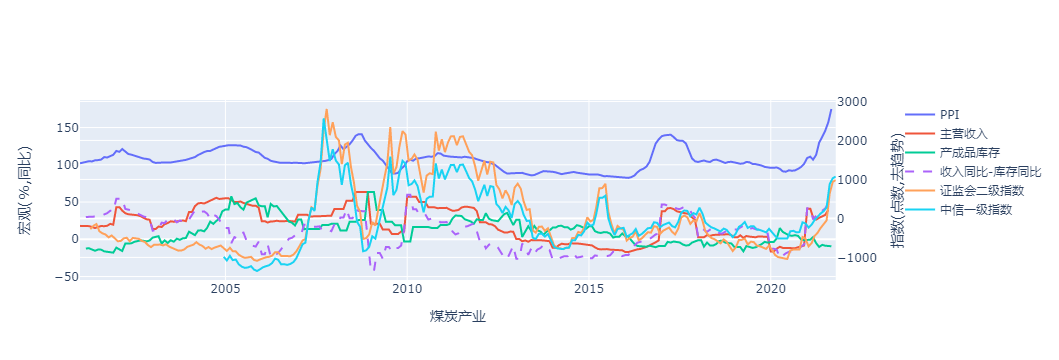

In [36]:
compare_plot(ppi['煤炭开采和洗选业'], income['煤炭开采和洗选业'], stock['煤炭开采和洗选业'], inc_stk['煤炭开采和洗选业'],
             statistic_ind['煤炭开采和洗选'], citic_ind['煤炭'], title='煤炭产业')

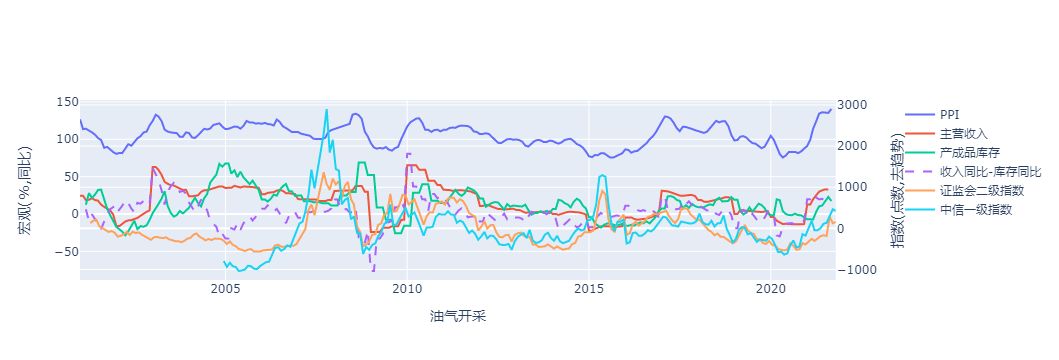

In [37]:
compare_plot(ppi['石油、煤炭和其他燃料加工业'], income['石油、煤炭和其他燃料加工业'], stock['石油、煤炭和其他燃料加工业'], inc_stk['石油、煤炭和其他燃料加工业'],
             statistic_ind['石油炼焦和核燃料'], citic_ind['石油石化'], title='油气开采')

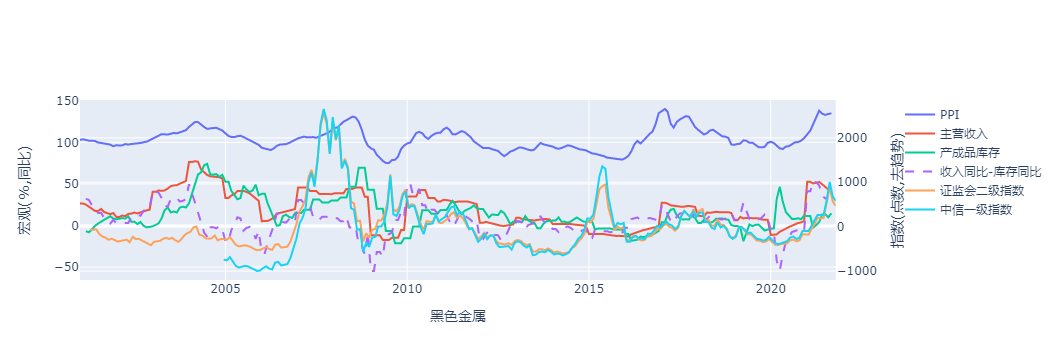

In [38]:
# ！
compare_plot(ppi['黑色金属冶炼和压延加工业'], income['黑色金属冶炼和压延加工业'], stock['黑色金属冶炼和压延加工业'], inc_stk['黑色金属冶炼和压延加工业'],
             statistic_ind['黑色金属'], citic_ind['钢铁'], title='黑色金属')

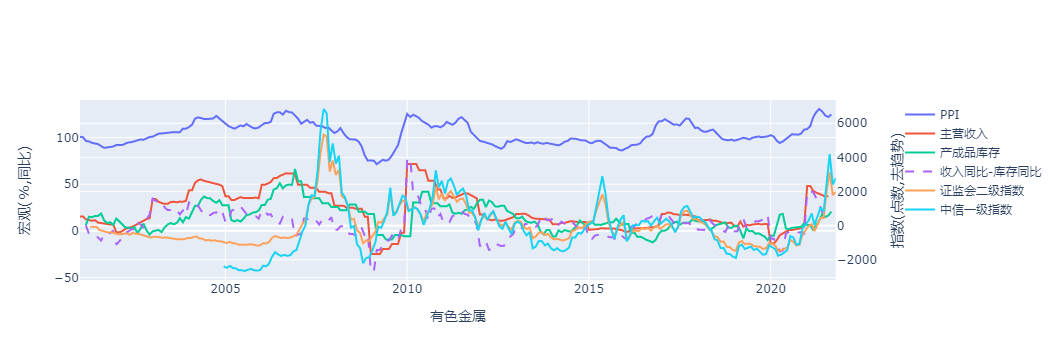

In [39]:
# ！
compare_plot(ppi['有色金属冶炼和压延加工业'], income['有色金属冶炼和压延加工业'], stock['有色金属冶炼和压延加工业'], inc_stk['有色金属冶炼和压延加工业'],
             statistic_ind['有色金属'], citic_ind['有色金属'], title='有色金属')

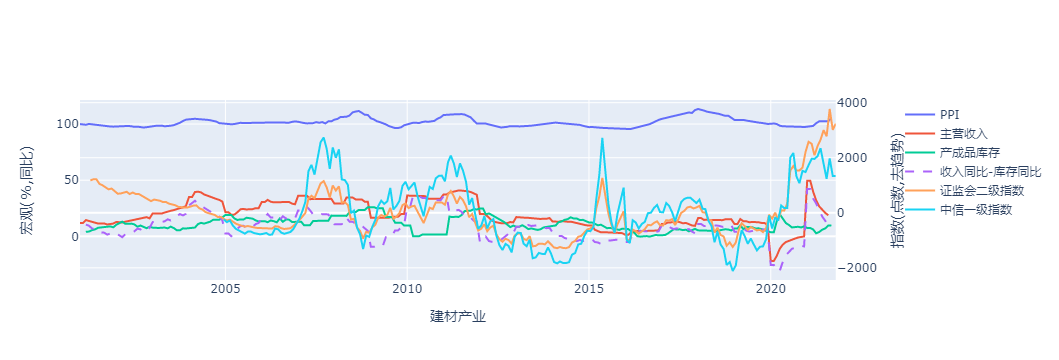

In [40]:
# ！
compare_plot(ppi['非金属矿物制品业'], income['非金属矿物制品业'], stock['非金属矿物制品业'], inc_stk['非金属矿物制品业'],
             statistic_ind['非金属'], citic_ind['建材'], title='建材产业')

## 中游材料

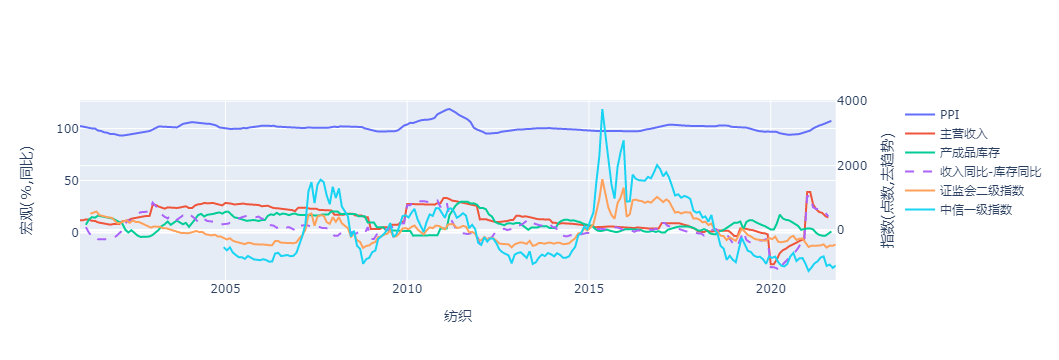

In [41]:
compare_plot(ppi['纺织业'], income['纺织业'], stock['纺织业'], inc_stk['纺织业'],
             statistic_ind['纺织'], citic_ind['纺织服装'], title='纺织')

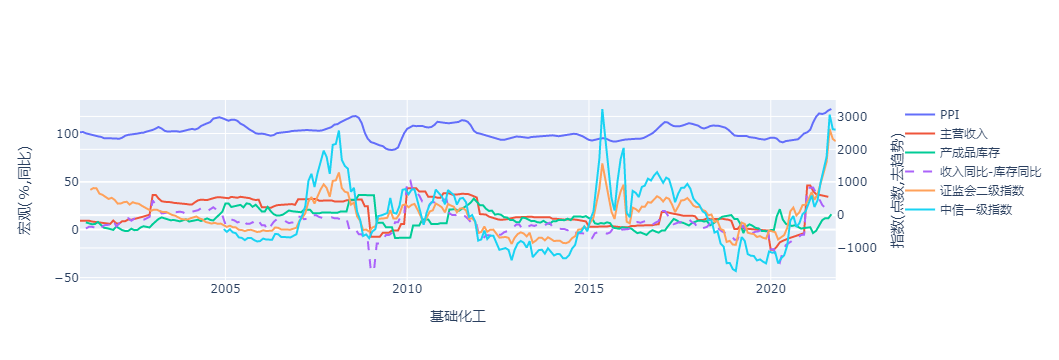

In [42]:
# ！
compare_plot(ppi['化学原料和化学制品制造业'], income['化学原料和化学制品制造业'], stock['化学原料和化学制品制造业'], inc_stk['化学原料和化学制品制造业'],
             statistic_ind['化学原料和化学制品'], citic_ind['基础化工'], title='基础化工')

## 中游制造

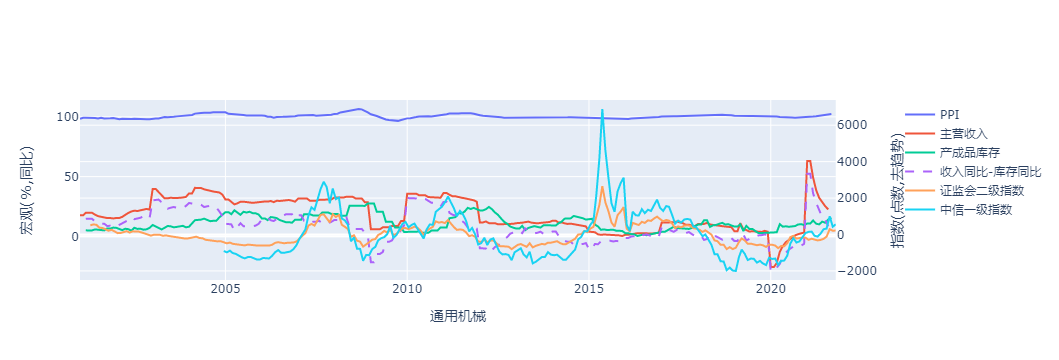

In [43]:
compare_plot(ppi['通用设备制造业'], income['通用设备制造业'], stock['通用设备制造业'], inc_stk['通用设备制造业'],
             statistic_ind['通用设备'], citic_ind['机械'], title='通用机械')

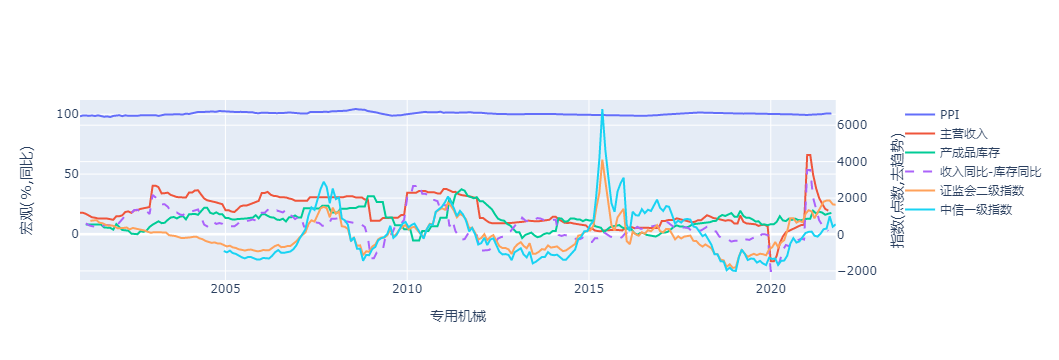

In [44]:
compare_plot(ppi['专用设备制造业'], income['专用设备制造业'], stock['专用设备制造业'], inc_stk['专用设备制造业'],
             statistic_ind['专用设备'], citic_ind['机械'], title='专用机械')

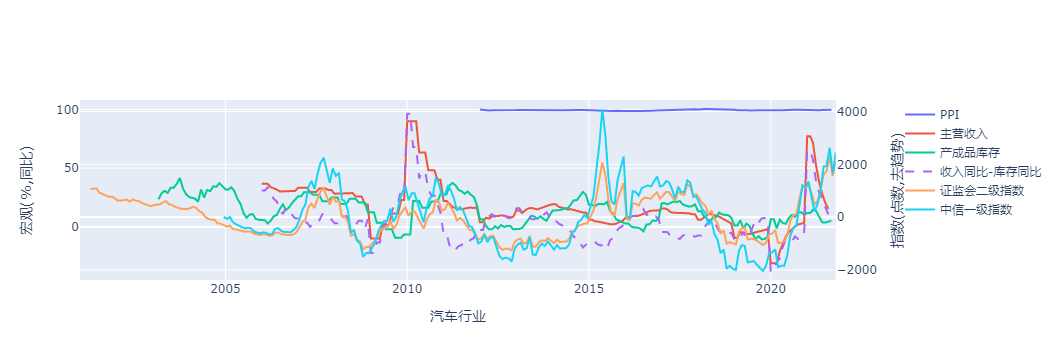

In [45]:
compare_plot(ppi['汽车制造业'], income['汽车制造业'], stock['汽车制造业'], inc_stk['汽车制造业'],
             statistic_ind['汽车制造'], citic_ind['汽车'], title='汽车行业')

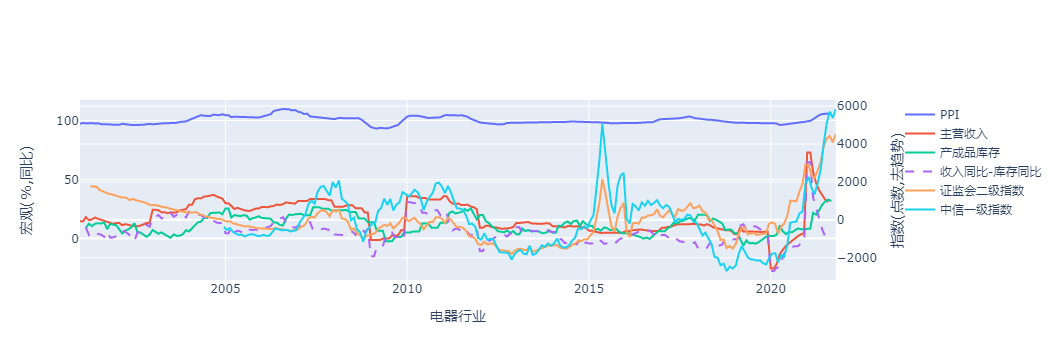

In [46]:
compare_plot(ppi['电气机械和器材制造业'], income['电气机械和器材制造业'], stock['电气机械和器材制造业'], inc_stk['电气机械和器材制造业'],
             statistic_ind['电气机械和器材制造'], citic_ind['电力设备及新能源'], title='电器行业')

## 科技医药

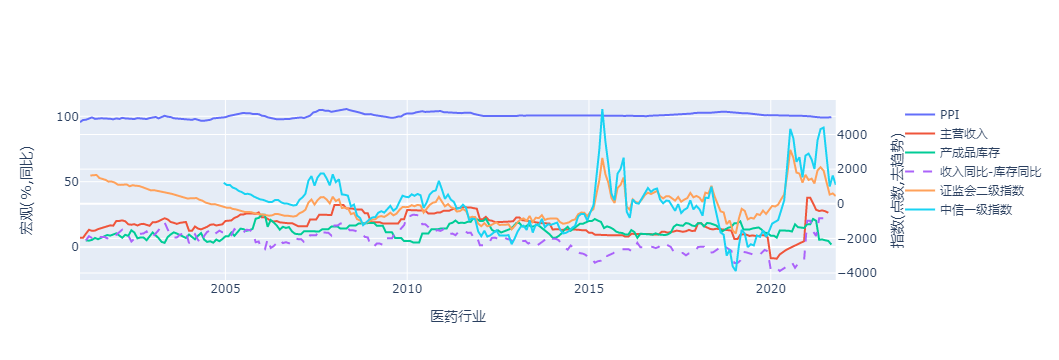

In [47]:
compare_plot(ppi['医药制造业'], income['医药制造业'], stock['医药制造业'], inc_stk['医药制造业'],
             statistic_ind['医药制造'], citic_ind['医药'], title='医药行业')

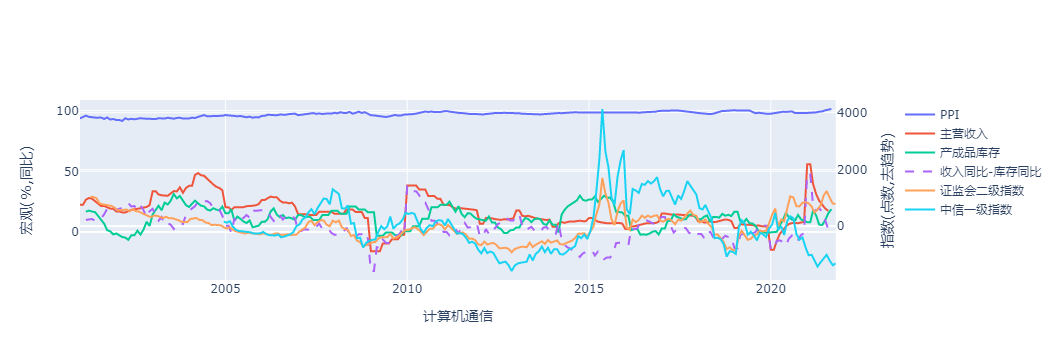

In [48]:
compare_plot(ppi['计算机、通信和其他电子设备制造业'], income['计算机、通信和其他电子设备制造业'], stock['计算机、通信和其他电子设备制造业'], inc_stk['计算机、通信和其他电子设备制造业'],
             statistic_ind['计算机通信和电子设备'], citic_ind['通信'], title='计算机通信')

## 下游消费

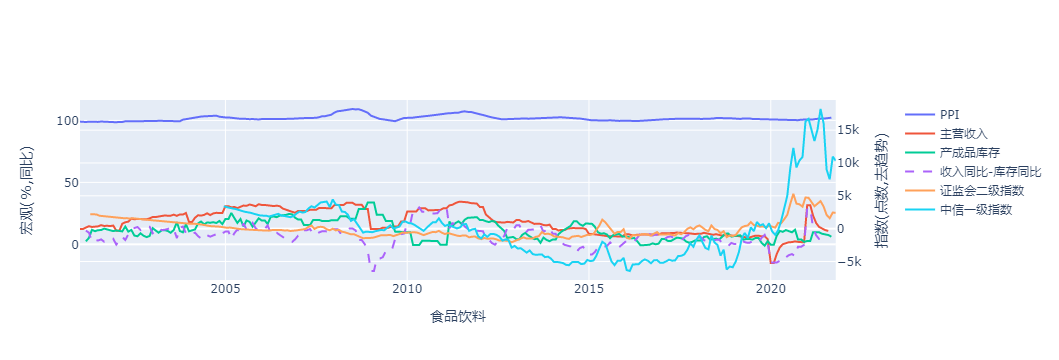

In [49]:
compare_plot(ppi['食品制造业'], income['食品制造业'], stock['食品制造业'], inc_stk['食品制造业'],
             statistic_ind['食品制造'], citic_ind['食品饮料'], title='食品饮料')

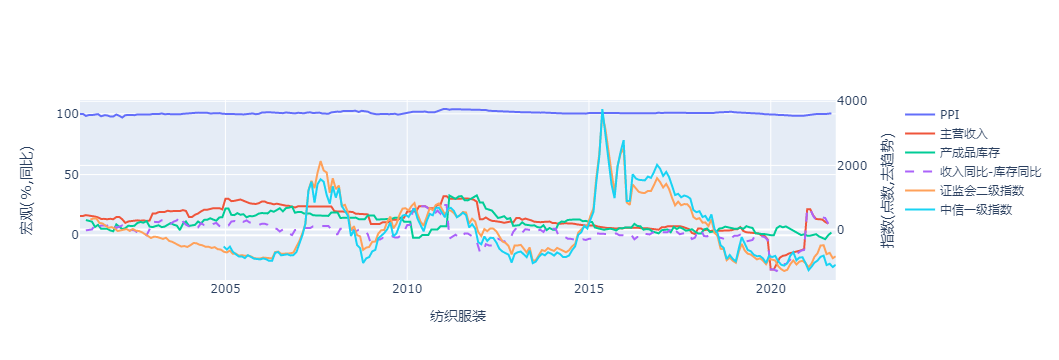

In [50]:
compare_plot(ppi['纺织服装、服饰业'], income['纺织服装、服饰业'], stock['纺织服装、服饰业'], inc_stk['纺织服装、服饰业'],
             statistic_ind['纺织服装服饰'], citic_ind['纺织服装'], title='纺织服装')

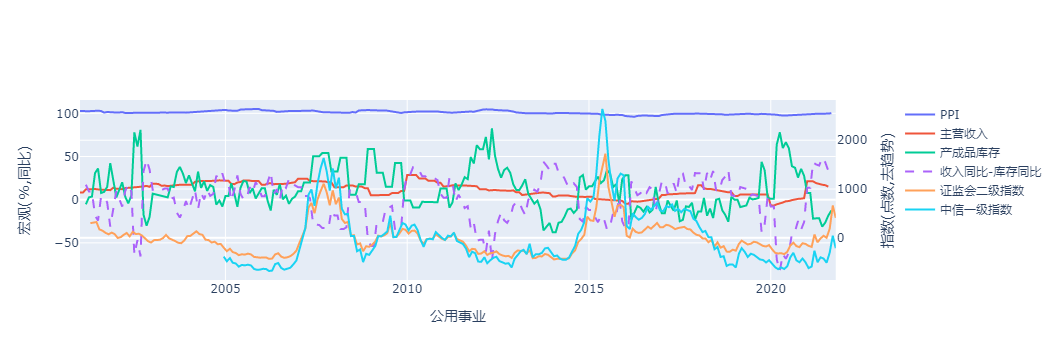

In [51]:
compare_plot(ppi['电力、热力生产和供应业'], income['电力、热力生产和供应业'], stock['电力、热力生产和供应业'], inc_stk['电力、热力生产和供应业'],
             statistic_ind['电热生产供应'], citic_ind['电力及公用事业'], title='公用事业')

In [ ]:
!jupyter nbconvert --no-input --output-dir="../output" --execute --to html C:\Users\rbsli\PycharmProjects\gist\stock_study.ipynb